## Step 1: Creating Test data and taking standardising it.

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [3]:
# creasting dummy data set with 500 points and 4 columns
# we have created dataset with 4 columns in which first
# two columns are independent of each other whereas 
# last two columns are linear combination of 1st two columns with 
# some noise added.
X = np.random.normal(0,1,(500,4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0,0.1,500)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0,0.1,500)

In [4]:
# standardising dataset created
X = X - np.mean(X,axis=0)

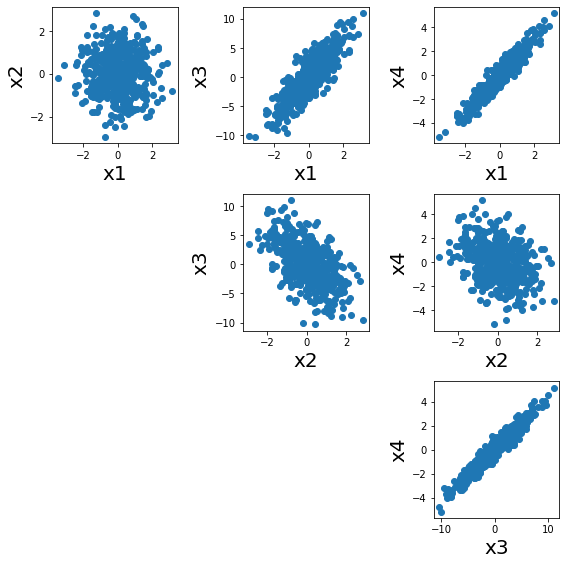

In [5]:
#plotting each data point for the purpose of visualisation of the
# correleation between the data points

plt.figure(figsize=(10,10))
for i in range(4):
  for j in range(4):
    if j > i:
      plt.subplot(4,4,i*4+j+1)
      plt.scatter(X[:,i],X[:,j])
      plt.xlabel(f'x{i+1}',fontsize=20)
      plt.ylabel(f'x{j+1}', fontsize=20)

plt.tight_layout()

### Observation

- X1 and X2 not correleated with each other.

- X3 and X4 are very much correlated with each other.

- X1 is very much correleated with X3 and X4. simmiliearly X2 is correleated with X3 and X4.

In [6]:
# Applying PCA with In built module

#initialize
pca = PCA(n_components=4)

#fit
pca.fit(X)

PCA(n_components=4)

In [7]:
 # getting the principal components
 principal_comps_builtin = pca.components_.T
 

In [8]:
# printing each principal components

for i,component in enumerate(pca.components_):
  print(f'principal component {i}')
  print(component)
  print()

  

principal component 0
[ 0.21262676 -0.12569068  0.89023069  0.38272842]

principal component 1
[-0.48526132 -0.796172    0.14569369 -0.33076419]

principal component 2
[-0.2126746  -0.29341083 -0.36019634  0.85961514]

principal component 3
[ 0.82102426 -0.51402538 -0.23774202 -0.07194314]



## Above mentioned PCA was using inbuilt Library.
Now we will be doing it by scratch

### Step 1: Calculating the covariance Matrix

In [18]:
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(500) ]) /500

### Step 2 :Calculating the eigenvalues  of the calculated co variance matrix

In [19]:
eigvecs = np.linalg.eig(cov_matrix)

### step 3 : sorting and calculating the eigen vectors corresponding to eigen values

In [20]:
ordering = np.argsort(eigvecs[0])[::-1]

In [21]:
#geting eigenvectors and eigen vectors are the PCAs according to the definiation

principal_comps_from_scratch = eigvecs[1][:,ordering]


In [22]:
principal_comps_from_scratch.T

array([[ 0.21262676, -0.12569068,  0.89023069,  0.38272842],
       [-0.48526132, -0.796172  ,  0.14569369, -0.33076419],
       [-0.2126746 , -0.29341083, -0.36019634,  0.85961514],
       [-0.82102426,  0.51402538,  0.23774202,  0.07194314]])

In [23]:
principal_comps_builtin.T

array([[ 0.21262676, -0.12569068,  0.89023069,  0.38272842],
       [-0.48526132, -0.796172  ,  0.14569369, -0.33076419],
       [-0.2126746 , -0.29341083, -0.36019634,  0.85961514],
       [ 0.82102426, -0.51402538, -0.23774202, -0.07194314]])

In [25]:
X.shape

(500, 4)